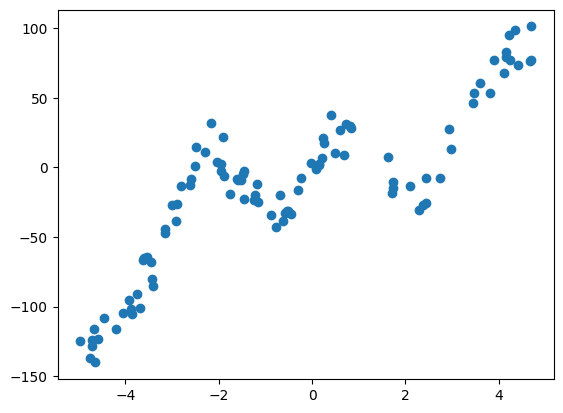

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

from torcheval.metrics.functional import r2_score

torch.manual_seed(69420)

# X = torch.arange(0, 1, 0.1, dtype=torch.float32)
# y = X**4

nObs = 100 # number of observations

# get noise around y observations
yNormal = torch.distributions.Normal(loc=0.0, scale=10)
yNoise  = yNormal.sample([nObs])

# get observations
X = 10*torch.rand([nObs])-5    # uniform from [-5,5]
y = X**3 - X**2 + 25 * torch.sin(2*X) + yNoise

plt.scatter(X, y)

In [2]:
class PillowNet(nn.Module):
    def __init__(self):
        super().__init__()
        
        neurons = 14
        
        self.seq = nn.Sequential(
            nn.Linear(1, neurons),
            nn.ReLU(),
            nn.Linear(neurons, neurons),
            nn.ReLU(),
            nn.Linear(neurons, 1),
        )
        
    def forward(self, x):
        out = self.seq(x)
        return out

model = PillowNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

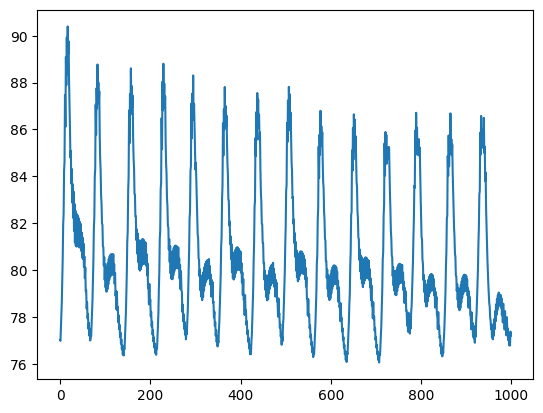

In [17]:
losses = []

model.train()
for epoch in range(1000):
    optimizer.zero_grad()
    
    preds = model(X.view(-1, 1))
    loss = criterion(preds, y.view(-1, 1))
    
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
plt.plot(losses)

tensor(0.9763)

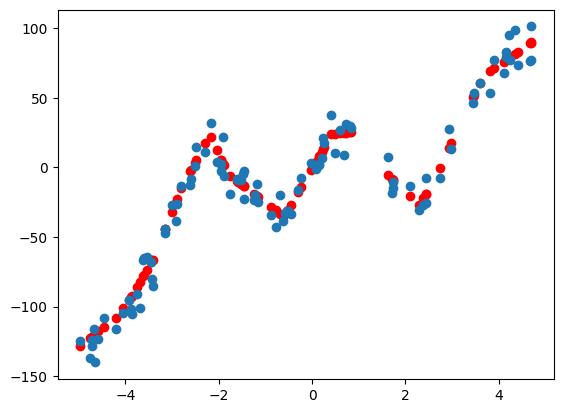

In [18]:
model.eval()
with torch.no_grad():
    pred_y = model(X.view(-1, 1))

# plt.plot(X, pred_y, color='g')
plt.scatter(X, pred_y, color='r')
plt.scatter(X, y)
r2_score(pred_y, y.view(-1, 1))

In [5]:
total_params = sum(p.numel() for p in model.parameters())
total_params

253